In [1]:
from AD_vibration.data_loader import DataLoader, Sensor
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import  decimate , welch
import pandas as pd

In [2]:
sensor = Sensor(name='ACC', location='MO04', data_type='TDD', format='.tdms')
data_loader = DataLoader(sensor=sensor)
start = datetime(2022, 3, 29,18,10,0)
signals = data_loader.get_data(start=start, end=start + timedelta(minutes=20))
signal = signals['ACC3_Z']

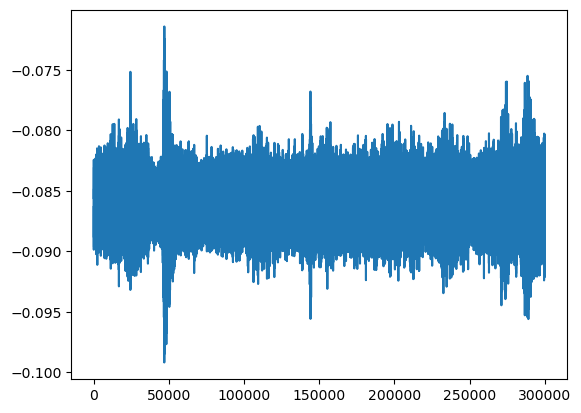

In [3]:
plt.plot(signal)

In [54]:
from scipy.signal import detrend
def compute_PSD(signals,fs=250,q=2,nperseg=250*30,noverlap=250*20):

    if q >1:
        signals = decimate(signals, q, axis=1)
        fs = fs/q
    signals
    signals = detrend(signals,type='constant')
    f,Sxxs= welch(signals,fs=int(fs/q),nperseg=nperseg,noverlap=noverlap)
    return f,Sxxs

In [58]:
Sxx

array([4.9387338e-11, 1.4171835e-10, 8.4945863e-11, ..., 9.4438894e-11,
       9.5964216e-11, 4.6561831e-11], dtype=float32)

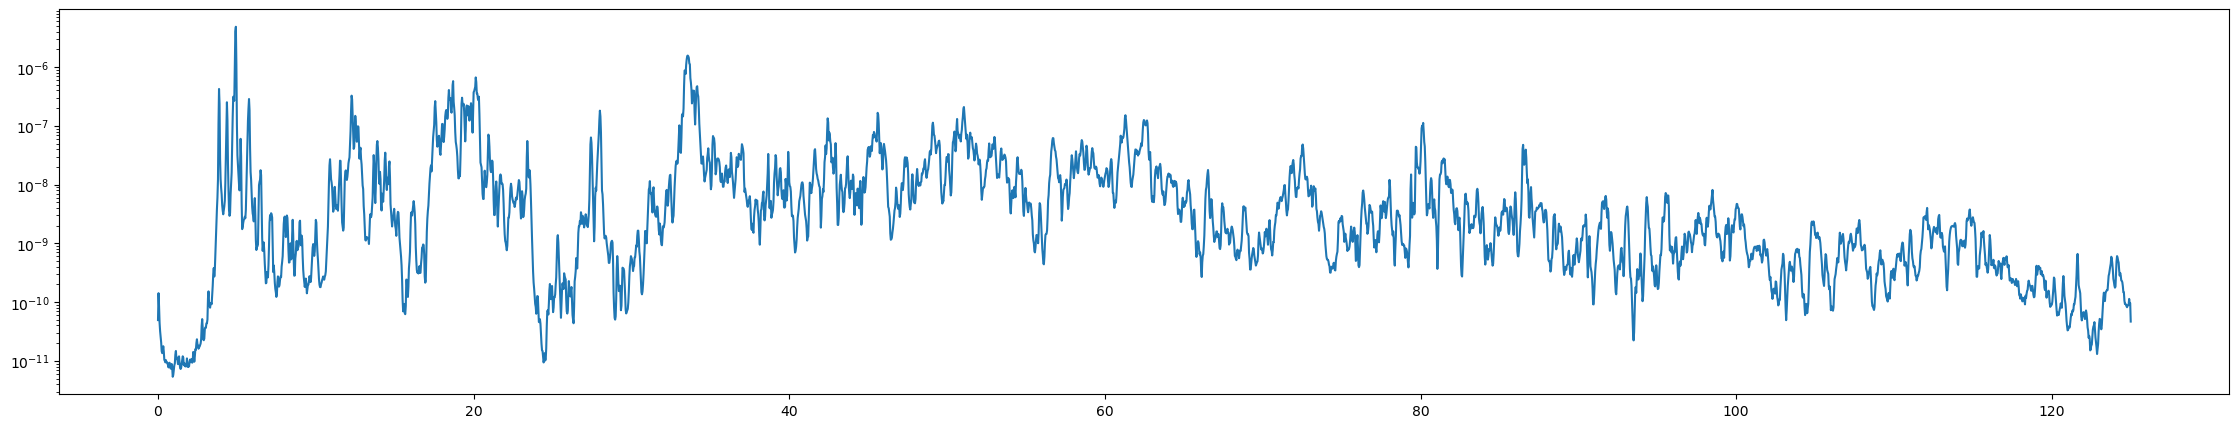

In [61]:
f,Sxx=compute_PSD(signal,q=1)
plt.figure(figsize=(28,5))
plt.plot(f,Sxx)
plt.yscale('log')

In [101]:
from kymatio.numpy import Scattering1D
Q=12
J=10
T=signal.shape[-1]

In [102]:
scat=Scattering1D(J=J,shape=T,Q=Q)

In [103]:
wav=scat(signal)

In [104]:
scat.meta_data

AttributeError: 'Scattering1D' object has no attribute 'meta_data'

In [74]:
meta = scat.meta()
order0 = np.where(meta['order'] == 0)
order1 = np.where(meta['order'] == 1)
order2 = np.where(meta['order'] == 2)

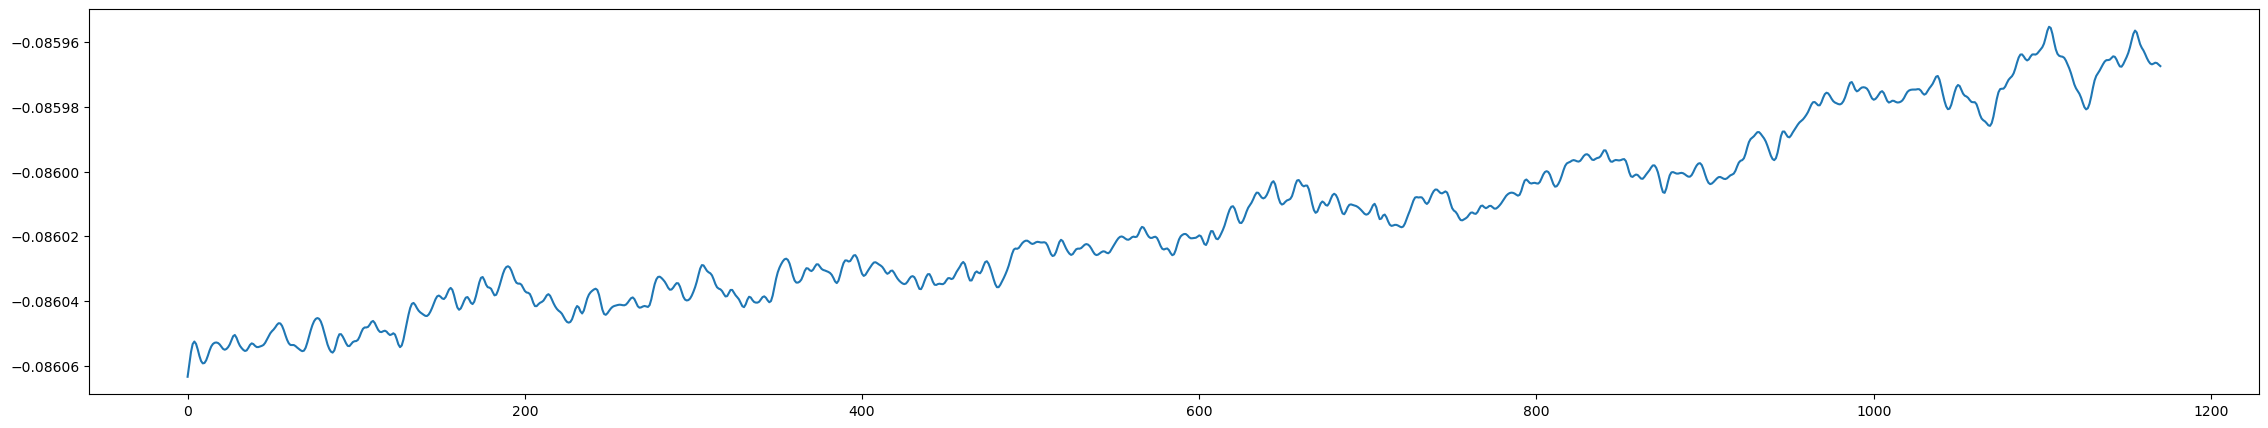

In [79]:
plt.figure(figsize=(28,5))
plt.plot(wav[order0].T)


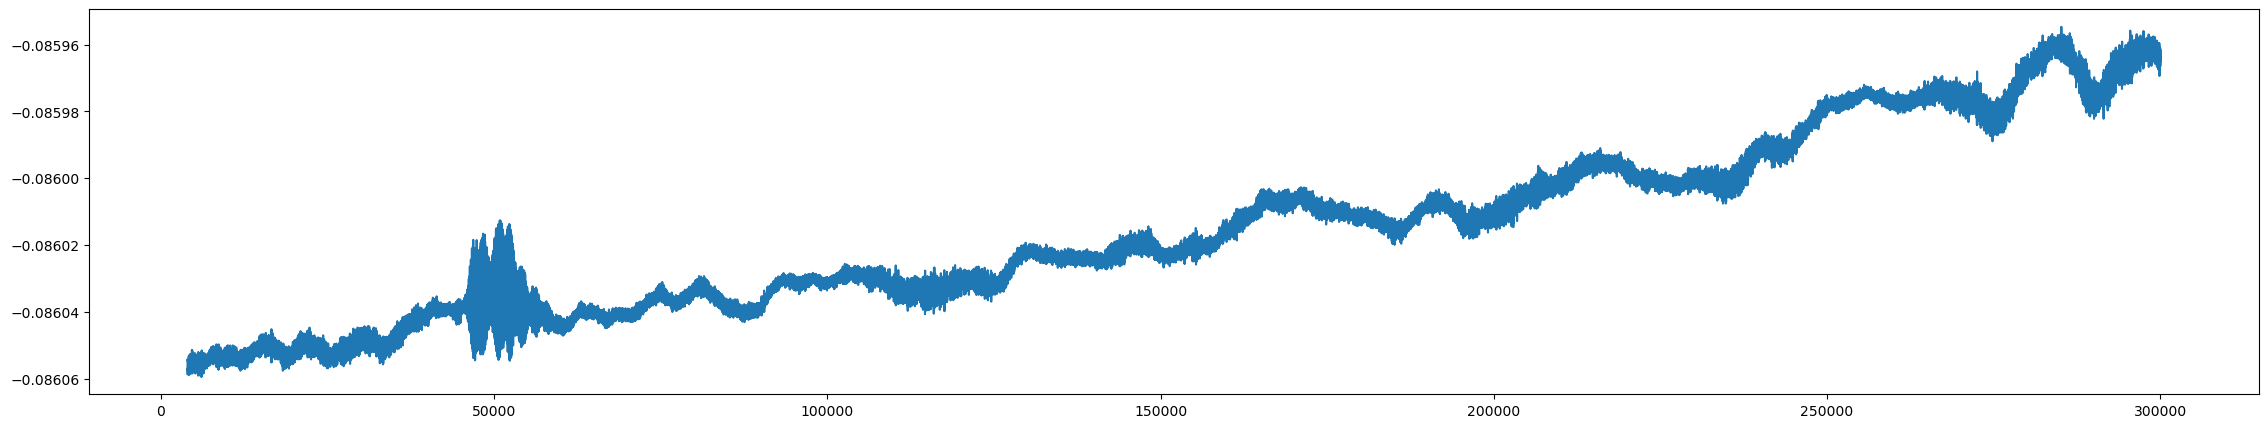

In [84]:
plt.figure(figsize=(28,5))
plt.plot(pd.Series(signal).rolling(4000).mean())

(array([[1.19794091e-09, 1.31048935e-09, 1.18421852e-09, ...,
         1.61469796e-09, 1.52401807e-09, 1.80122366e-09],
        [5.39388654e-10, 7.83579194e-10, 6.82605752e-10, ...,
         6.34487104e-10, 8.20263411e-10, 1.15424902e-09],
        [4.62267861e-11, 1.72349005e-11, 2.22874467e-12, ...,
         6.71707302e-13, 3.11463882e-11, 2.53266730e-11],
        ...,
        [6.77279792e-11, 3.73025525e-11, 3.04929797e-11, ...,
         5.50952250e-10, 3.97128079e-10, 9.95967863e-12],
        [1.97318521e-10, 3.86739728e-11, 1.50955556e-11, ...,
         1.57869796e-10, 1.09699840e-09, 7.37203652e-12],
        [1.26765808e-10, 2.31759136e-12, 3.81829603e-11, ...,
         5.31529107e-11, 7.37698991e-10, 2.56490593e-12]]),
 array([  0.       ,   0.9765625,   1.953125 ,   2.9296875,   3.90625  ,
          4.8828125,   5.859375 ,   6.8359375,   7.8125   ,   8.7890625,
          9.765625 ,  10.7421875,  11.71875  ,  12.6953125,  13.671875 ,
         14.6484375,  15.625    ,  16.6015625,

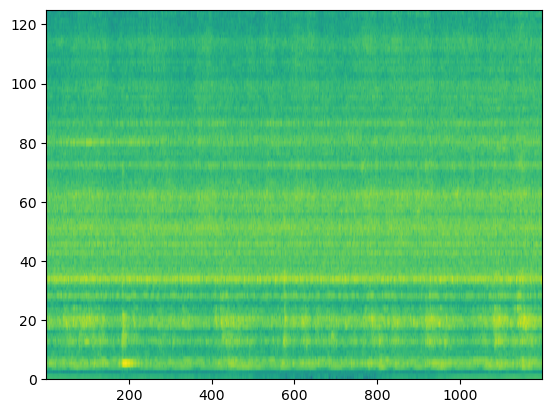

In [99]:
plt.specgram(detrend(signal,type='constant'),Fs=250)

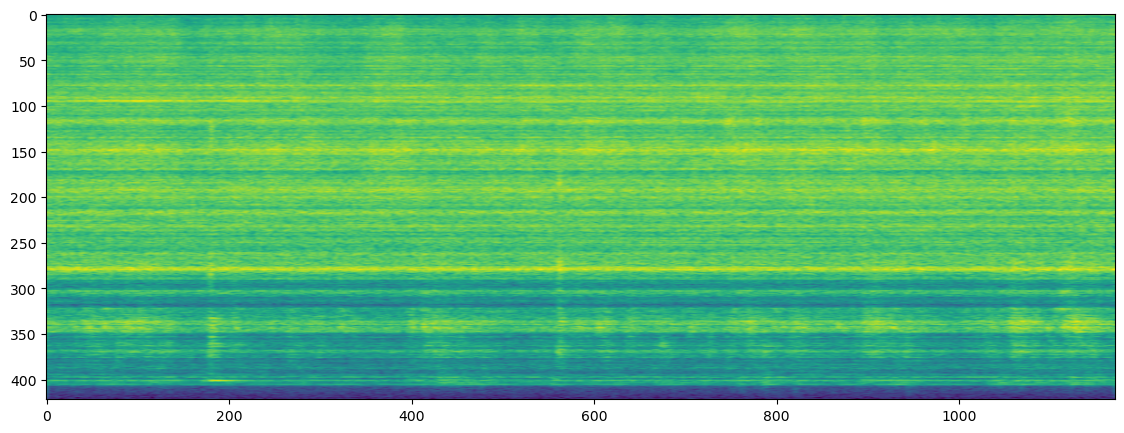

In [91]:
plt.figure(figsize=(28,5))
plt.imshow(np.log(wav[order1]))


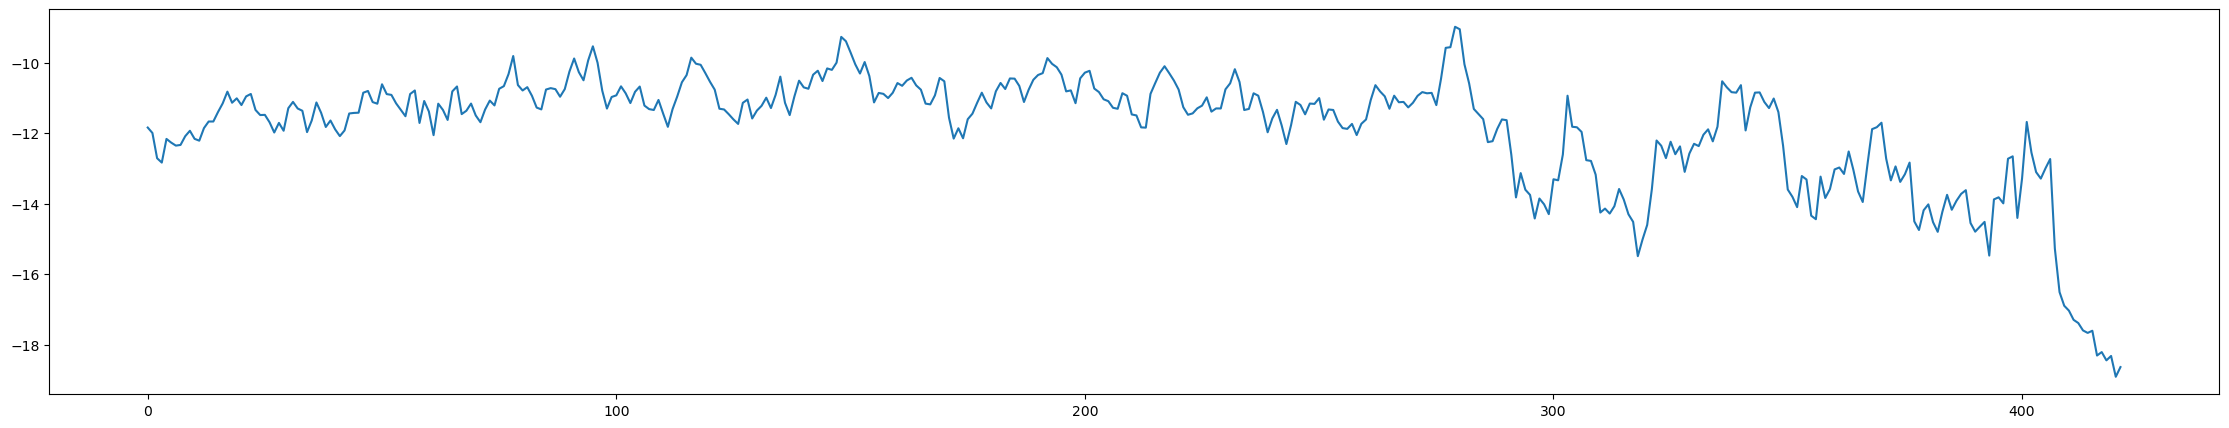

In [100]:
plt.figure(figsize=(28,5))
plt.plot(np.log(wav[order1]).mean(axis=-1))


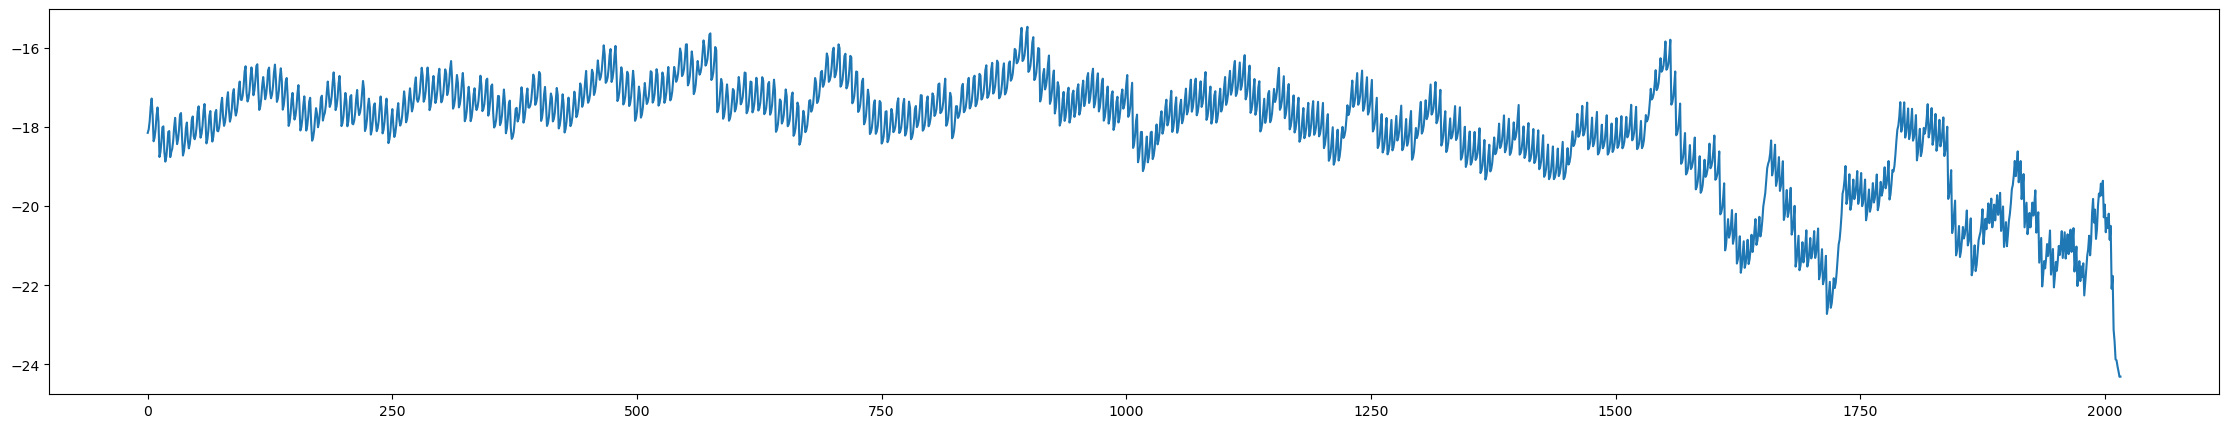

In [93]:
plt.figure(figsize=(28,5))
plt.plot(np.log(wav[order2]).mean(axis=-1))

In [6]:
import pywt
w = pywt.Wavelet('sym3')
d=pywt.wavedec(signal, w)

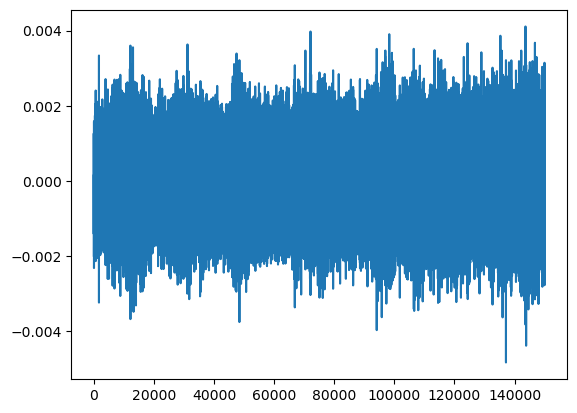

In [31]:
plt.plot(d[15])

(array([5.55456756e-10, 8.73135645e-10, 8.27952275e-10, 5.44115880e-10,
        5.96895354e-10, 1.81058891e-09, 2.14585952e-09, 1.47650595e-09,
        3.00533632e-09, 4.51484788e-09, 9.91307309e-09, 8.30831340e-09,
        6.72625000e-09, 5.16010029e-09, 3.29805794e-09, 1.73428355e-09,
        2.89218172e-09, 6.39971126e-09, 6.44884071e-09, 6.07581076e-09,
        4.81441867e-09, 2.20573786e-09, 1.58832705e-09, 1.19822952e-09,
        1.33658218e-09, 1.52770949e-09, 1.57958881e-09, 5.44798389e-10,
        2.57120392e-10, 4.93855512e-10, 7.05805103e-10, 4.97302464e-10,
        2.09965471e-10, 4.19058523e-10, 4.49553700e-10, 4.27424241e-10,
        3.30583667e-10, 1.98554533e-10, 1.41861131e-10, 1.88028855e-10,
        1.62269941e-10, 1.28379271e-10, 1.69626545e-10, 2.28291244e-10,
        1.74126031e-10, 1.46056329e-10, 2.47359805e-10, 1.63032495e-10,
        7.13484618e-11, 6.56031324e-11, 1.55761365e-10, 1.95163291e-10,
        9.74637353e-11, 6.72077809e-11, 7.56001512e-11, 1.231644

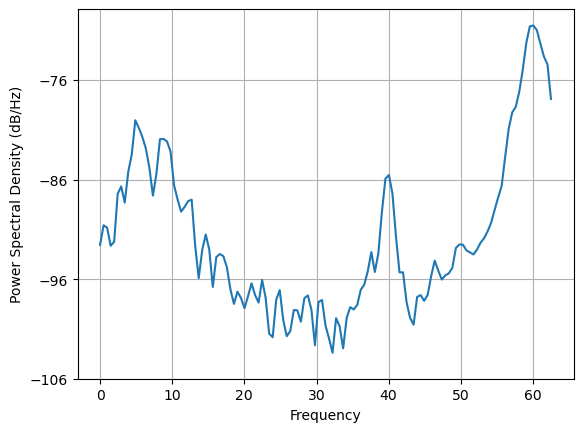

In [24]:
plt.psd(d[9],Fs=125)